<a href="https://colab.research.google.com/github/gannygit/melodic_graph/blob/main/melodic_graph_full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Melodic graphs

###Importing libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

###Declaring note levels

In [2]:
# Note levels
note_levels = {
    "ma1":-7,
    "ma2":-6,
    "pa":-5,
    "dha1":-4,
    "dha2":-3,
    "ni1":-2,
    "ni2":-1,
    "Sa": 0,
    "Re1": 1,
    "Re2": 2,
    "Ga1": 3,
    "Ga2": 4,
    "Ma1": 5,
    "Ma2": 6,
    "Pa": 7,
    "Dha1": 8,
    "Dha2": 9,
    "Ni1": 10,
    "Ni2": 11,
    "SA": 12,
    "RE1":13,
    "RE2":14,
    "GA1":15,
    "GA2": 16,
    "MA1": 17,
    "MA2": 18,
    "PA": 19,
    "DHA1": 20,
    "DHA2": 21
}

### Creating a graph by listing key phrases

####Listing phrases

In [3]:
# example phrases for HD
phrases_list = [
    ["Ga2","Re2","Sa"],
    ["Re2","Sa","ni2","pa"],
    ["pa","Re2","ni2","Re2"],
    ["pa","ni2","Sa","Re2"],
    ["Sa","ni2","Sa","Re2"],
    ["Sa","Re2","Ga2"],
    ["Ga2","Pa","Ga2","Re2"],
    ["Ga2","Pa","Ni2","Pa"],
    ["Ga2","Pa","Ni2","SA"],
    ["RE2","SA","Ni2","Pa"],
    ["RE2","GA2","RE2","SA"],
    ["Ga2","Re2","Ga2","Pa"],
    ["Ni2","Pa","Ga2","Re2"],
    ["Pa","Ga2","Re2"],
    ["SA","Ni2","Pa"],
    ["Pa","Ga2","Ni2","Pa"]
]


In [ ]:
'''
# example phrases for IC
phrases_list = [
    ["Ga2","Ma1","Pa","Dha2","Ni1","Dha2","Pa"],
    ["Pa","Dha2","Ni1","Dha2","Pa"],
    ["Ga2","Ma1","Pa"],
    ["Pa", "Dha2", "SA"],
    ["Ga2", "Ma1", "Ni1", "Dha2", "SA"],
    ["Ga2","Ma1","Ni1","Dha2","Pa"],
    ["Ga2","Ma1","Ga2","Sa"],
    ["ni1","dha2","Sa"],
    ["ni1","dha2","pa","dha2","Sa"],
    ["Sa","Ga2","Ma1"],
    ["Ni1","Dha2","Pa"],
    ["Ni1","Dha2","SA"],
    ["SA","GA2","MA1","GA2","SA"]
]
'''

In [ ]:
'''
# example phrases for BS
phrases_list = [
    ["Ni1", "Pa", "Ma1", "Re2", "Sa"],
    ["Ni1", "Pa", "Ma1", "Re2"],
    ["Sa", "ni2", "Sa"],
    ["Pa", "Ni2", "SA"],
    ["Pa", "Ni1", "Pa"],
    ["Re2", "Ma1", "Pa"],
    ["Ma1", "Pa", "Ni2", "SA"],
    ["Re2", "Ma1", "Pa", "Ni2", "SA"],
    ["Re2", "Pa", "Ma1", "Re2", "Sa"],
    ["ni2", "Sa"],
    ["ni1", "pa", "ni2", "Sa"],
    ["pa", "ni2", "Sa"],
    ["Re2", "Pa", "Ma1", "Ni1", "Ma1", "Pa"],
    ["RE2", "SA", "Ni2", "RE2", "SA"],
    ["SA", "Ni1", "Pa", "Ma1"]
]
'''

####Graph construction

In [4]:
def construct_graph_from_phrases(phrases_list):
    G = nx.DiGraph()

    # Create Nodes and Edges for Each Phrase
    for phrase_index, phrase in enumerate(phrases_list):
        for note_index, note in enumerate(phrase):
            node_id = f"{note}_{phrase_index}_{note_index}"
            is_griha = (note_index == 0)
            is_nyasa = (note_index == len(phrase) - 1)

            G.add_node(node_id, note=note, is_griha=is_griha, is_nyasa=is_nyasa)

            if note_index > 0:
                prev_note = phrase[note_index - 1]
                prev_node_id = f"{prev_note}_{phrase_index}_{note_index-1}"
                G.add_edge(prev_node_id, node_id)


    return G

In [5]:
# Construct the graph
G = construct_graph_from_phrases(phrases_list)

####Visualisation

In [ ]:
'''
# alternative visualisation
def visualize_graph_2(graph, note_levels, title):
    pos = {node: (i, note_levels[attrs["note"]]) for i, (node, attrs) in enumerate(graph.nodes(data=True))}

    # draw the full graph
    #nx.draw(graph, pos, with_labels=True, node_color='lightgrey', node_size=35, font_size=10, arrows=True)

    fig, ax = plt.subplots()

    # grid lines/ reference lines for visualisation
    x = np.arange(len(graph.nodes))

    for note in note_levels:
        if note_levels[note] in [-5,0,7,12,19]:
            ax.plot(x,(note_levels[note]+x*0),color='green')
        else:
            ax.plot(x,(note_levels[note]+x*0),color='grey',linewidth=0.5)

    # highlight griha and nyasa notes
    nyasa_nodes = [node for node, attrs in graph.nodes(data=True) if (attrs["is_nyasa"] and not attrs["is_griha"])]
    griha_nodes = [node for node, attrs in graph.nodes(data=True) if (attrs["is_griha"] and not attrs["is_nyasa"])]
    mix_nodes = [node for node, attrs in graph.nodes(data=True) if (attrs["is_griha"] and attrs["is_nyasa"])]
    other_nodes = [node for node in graph.nodes() if node not in griha_nodes and node not in nyasa_nodes and node not in mix_nodes]

    # draw nodes
    nx.draw_networkx_nodes(graph, pos, nodelist=griha_nodes, node_color='green', node_size=100, label='Griha Notes')
    nx.draw_networkx_nodes(graph, pos, nodelist=nyasa_nodes, node_color='red', node_size=100, label='Nyasa Notes')
    nx.draw_networkx_nodes(graph, pos, nodelist=mix_nodes, node_color='cyan', node_size=100, label='Mix Notes')
    nx.draw_networkx_nodes(graph, pos, nodelist=other_nodes, node_color='lightblue', node_size=100, label='Other Notes')

    # draw edges
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges, arrowstyle='-|>', arrowsize=10)

    # Draw node labels with note names
    # note_labels = {node: attrs["note"] for node, attrs in graph.nodes(data=True)}
    # nx.draw_networkx_labels(graph, pos, labels=note_labels, font_size=10, font_color='black')


    # add a legend and title
    ax.legend(scatterpoints=1, loc='upper left')
    ax.set_title(title)

    # add y-axis labels
    y_ticks = list(note_levels[note] for note in note_levels)
    y_labels = list(note for note in note_levels)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)

    # show graph
    plt.show()

In [6]:
def visualize_graph(graph, note_levels, title,show_mixed_nodes = True,upper_margin = 1):
    pos = {node: (i, note_levels[attrs["note"]]) for i, (node, attrs) in enumerate(graph.nodes(data=True))}

    fig, ax = plt.subplots()

    # Plot the grid lines / reference lines for visualization
    x = np.arange(len(graph.nodes))
    occuring_note_levels = []

    for note in note_levels:
        for node,attrs in graph.nodes(data=True):
            if note == attrs["note"]:
                occuring_note_levels.append(note)
                continue

    for note in occuring_note_levels:
        color = 'green' if note_levels[note] in [-5, 0, 7, 12, 19] else 'grey'
        ax.plot(x, (note_levels[note] + x * 0), color=color, linewidth=0.5 if color == 'grey' else 1)

    # Draw nodes with different colors based on their attributes
    nyasa_nodes = [node for node, attrs in graph.nodes(data=True) if (attrs["is_nyasa"] and not attrs["is_griha"])]
    griha_nodes = [node for node, attrs in graph.nodes(data=True) if (attrs["is_griha"] and not attrs["is_nyasa"])]
    if show_mixed_nodes:
        mix_nodes = [node for node, attrs in graph.nodes(data=True) if (attrs["is_griha"] and attrs["is_nyasa"])]
        other_nodes = [node for node in graph.nodes() if node not in griha_nodes and node not in nyasa_nodes and node not in mix_nodes]
    else:
        other_nodes = [node for node in graph.nodes() if node not in griha_nodes and node not in nyasa_nodes]

    # Plot the nodes manually
    ax.scatter([pos[node][0] for node in griha_nodes], [pos[node][1] for node in griha_nodes], c='green', s=100, label='Griha Notes')
    ax.scatter([pos[node][0] for node in nyasa_nodes], [pos[node][1] for node in nyasa_nodes], c='red', s=100, label='Nyasa Notes')
    if show_mixed_nodes:
        ax.scatter([pos[node][0] for node in mix_nodes], [pos[node][1] for node in mix_nodes], c='cyan', s=100, label='Mix Notes')
    ax.scatter([pos[node][0] for node in other_nodes], [pos[node][1] for node in other_nodes], c='lightblue', s=100, label='Other Notes')

    # Draw edges manually
    #for edge in graph.edges:
     #   x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
      #  y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
       # ax.plot(x_coords, y_coords, color='black', linewidth=1, alpha=0.5)

    # Draw edges with arrows manually
    for edge in graph.edges:
        start = pos[edge[0]]
        end = pos[edge[1]]
        arrow_props = dict(arrowstyle='-|>', linewidth = 0.5, color='black')
        ax.annotate('', xy=end, xytext=start, arrowprops=arrow_props)


    # Add a legend and title
    ax.legend(scatterpoints=1, loc='upper left')
    ax.set_title(title)

    # Add y-axis labels
    y_ticks = list(note_levels[note] for note in occuring_note_levels)
    y_labels = list(note for note in occuring_note_levels)

    # Set the ticks and labels
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_ylim(min(list(note_levels[note] for note in occuring_note_levels))-1,max(list(note_levels[note] for note in occuring_note_levels))+upper_margin)
    plt.xticks([])
    plt.draw()
    # Show graph
    plt.show()

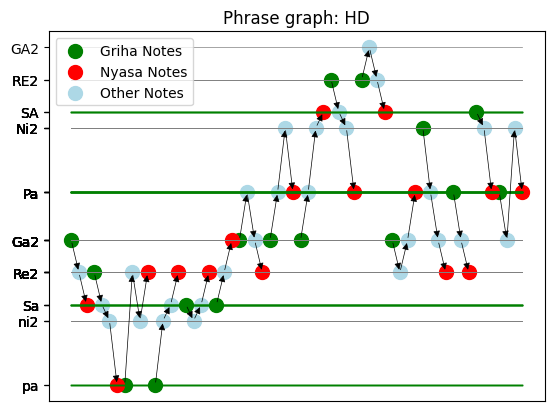

In [7]:
# Visualize the graph
title = "Phrase graph: HD"
visualize_graph(G, note_levels, title,show_mixed_nodes = False)

In [8]:
def merge_forward(G,G1 = nx.DiGraph()):
    for node, attrs in G.nodes(data=True):
        current_node = node

        if attrs["is_griha"]:
            match_found = find_match(G1,list(G1.nodes()),attrs["note"])
            if match_found:
                matching_node, matching_attrs = get_match(G1,list(G1.nodes()),attrs["note"])
                G1.nodes[f"{matching_node}"].update({"is_griha": attrs["is_griha"] or matching_attrs["is_griha"] , "is_nyasa":attrs["is_nyasa"] or matching_attrs["is_nyasa"]})
                if G.successors(current_node) == []:
                    continue
                previous_node = matching_node
                continue_merge = True
                continue
            else:
                # add node to the target graph (G1) with the same attributes
                G1.add_node(f"{node}", **attrs)
                #next_node = list(G.successors(current_node))[0]
                previous_node = current_node
                continue_merge = False
                continue
        if continue_merge:
            match_found = find_match(G1,list(G1.successors(previous_node)),attrs["note"])
            if match_found:
                matching_node, matching_attrs = get_match(G1,list(G1.successors(previous_node)),attrs["note"])
                G1.nodes[f"{matching_node}"].update({"is_griha": attrs["is_griha"] or matching_attrs["is_griha"] , "is_nyasa":attrs["is_nyasa"] or matching_attrs["is_nyasa"]})
                #next_node = list(G.successors(current_node))[0]
                previous_node = matching_node
                continue_merge = True
                continue
            else:
                # add node to the target graph (G1) with the same attributes
                G1.add_node(f"{node}", **attrs)
                G1.add_edge(f"{previous_node}", f"{current_node}")
                #next_node = list(G.successors(current_node))[0]
                previous_node = current_node
                continue_merge = False
                continue
        else:
            # copying the remaining phrase after merging its starting part
            #print(f"{node}")
            # add node to the target graph (G1) with the same attributes
            G1.add_node(f"{node}", **attrs)
            G1.add_edge(f"{previous_node}", f"{current_node}")
            previous_node = current_node
            continue_merge = False


    return G1


def find_match(graph, nodes_list, level):
    for node in nodes_list:
        if graph.nodes[f"{node}"]["note"] == level:
            return True
        else:
            continue

    return False



def get_match(graph, nodes_list, level):
    for node in nodes_list:
        attrs = graph.nodes[f"{node}"]
        if attrs["note"] == level:
            return node,attrs
        else:
            continue

    return node,attrs

In [9]:
compact_graph = merge_forward(G)

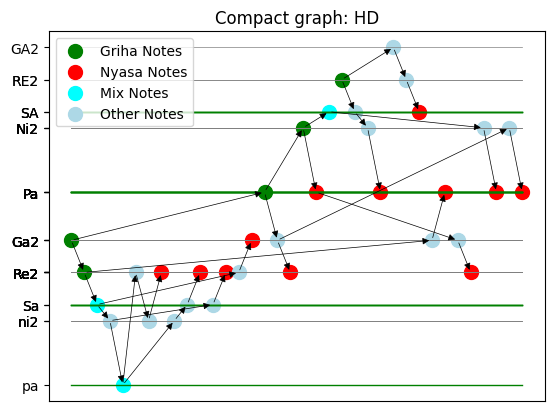

In [10]:
# Visualize the graph
title = "Compact graph: HD"
visualize_graph(compact_graph, note_levels, title, show_mixed_nodes = True)

In [11]:
def add_virtual_edges(G, max_level_diff):
    nyasa_nodes = [node for node, attrs in G.nodes(data=True) if attrs["is_nyasa"]]
    griha_nodes = [node for node, attrs in G.nodes(data=True) if attrs["is_griha"]]

    for nyasa in nyasa_nodes:
        for griha in griha_nodes:
            nyasa_note = G.nodes[nyasa]["note"]
            griha_note = G.nodes[griha]["note"]
            if abs(note_levels[nyasa_note] - note_levels[griha_note]) <= max_level_diff:
                G.add_edge(nyasa, griha, virtual=True)  # Marking the edge as virtual

    return G

In [12]:
# Define maximum level difference for virtual edges
max_level_diff = 4
copy_graph = compact_graph.copy()
graph_virtual = add_virtual_edges(copy_graph, max_level_diff)

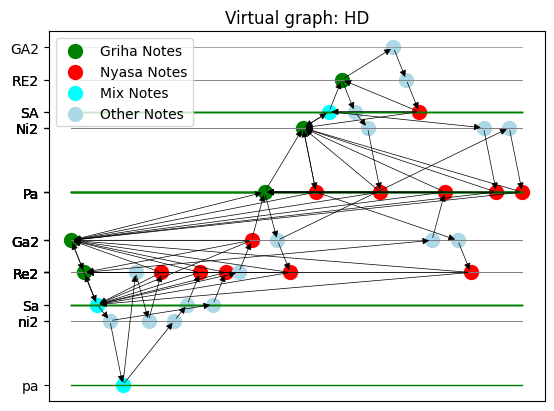

In [13]:
# Visualize the graph
title = "Virtual graph: HD"
visualize_graph(graph_virtual, note_levels,title)

In [14]:
def find_all_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = find_all_paths(graph, node, end, path)
            for new_path in new_paths:
                paths.append(new_path)
    return paths


In [15]:
graph_virtual.nodes()

NodeView(('Ga2_0_0', 'Re2_0_1', 'Sa_0_2', 'ni2_1_2', 'pa_1_3', 'Re2_2_1', 'ni2_2_2', 'Re2_2_3', 'ni2_3_1', 'Sa_3_2', 'Re2_3_3', 'Sa_4_2', 'Re2_4_3', 'Re2_5_1', 'Ga2_5_2', 'Pa_6_1', 'Ga2_6_2', 'Re2_6_3', 'Ni2_7_2', 'Pa_7_3', 'SA_8_3', 'RE2_9_0', 'SA_9_1', 'Ni2_9_2', 'Pa_9_3', 'GA2_10_1', 'RE2_10_2', 'SA_10_3', 'Ga2_11_2', 'Pa_11_3', 'Ga2_12_2', 'Re2_12_3', 'Ni2_14_1', 'Pa_14_2', 'Ni2_15_2', 'Pa_15_3'))

In [16]:
# Example
node_1 = "Ga2_0_0"
node_2 = "SA_8_3"
all_paths = find_all_paths(graph_virtual, node_1,node_2)

In [17]:
def visualize_paths(graph, paths, note_levels, title):
    pos = {vertex: (i, note_levels[attributes["note"]]) for i, (vertex, attributes) in enumerate(graph.nodes(data=True))}

    # Draw the full graph
    nx.draw(graph, pos, with_labels=False, node_color='lightgrey', node_size=30, font_size=10, arrows=True)

    # Highlight the paths
    for path in paths:
        edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='blue', node_size=50)
        nx.draw_networkx_edges(graph, pos, edgelist=edges_in_path, edge_color='blue', width=2)

    # Draw node labels with note names
    note_labels = {vertex: attributes["note"] for vertex, attributes in graph.nodes(data=True)}
    nx.draw_networkx_labels(graph, pos, labels=note_labels, font_size=12, font_color='black')

    # Show the plot
    plt.title(title)
    plt.show()


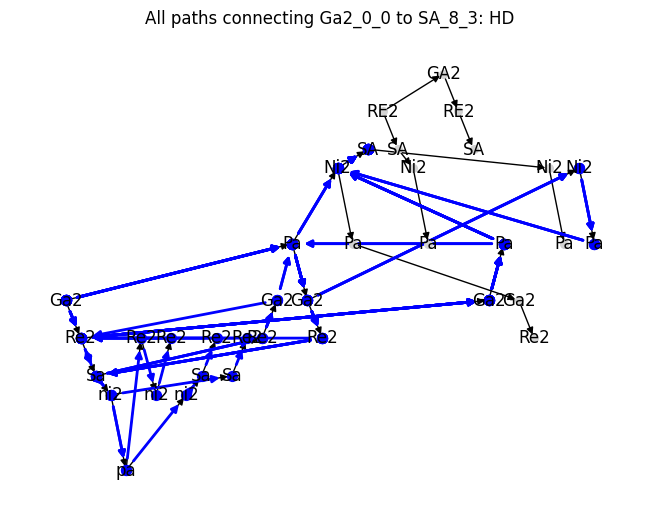

In [18]:
# Visualize the valid paths
title = f"All paths connecting {node_1} to {node_2}: HD"
visualize_paths(compact_graph, all_paths, note_levels,title)

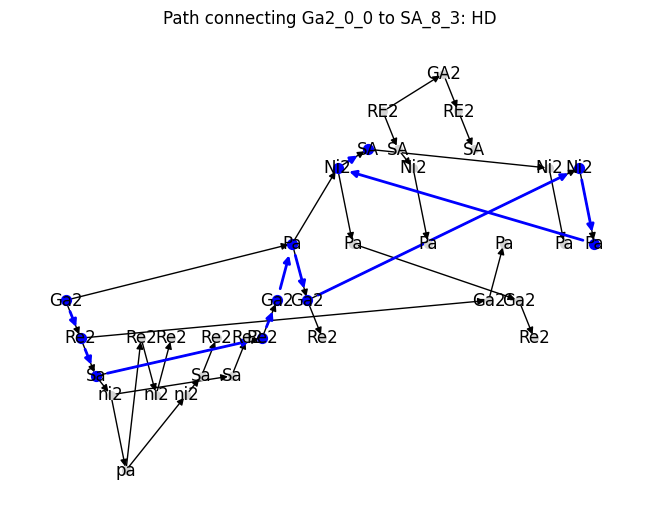

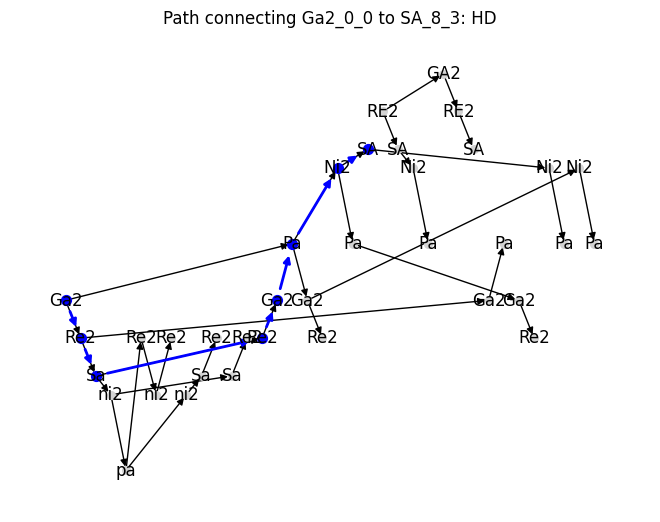

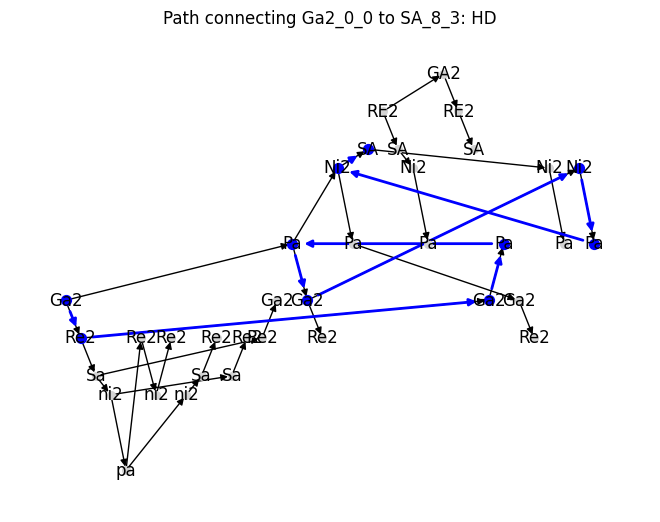

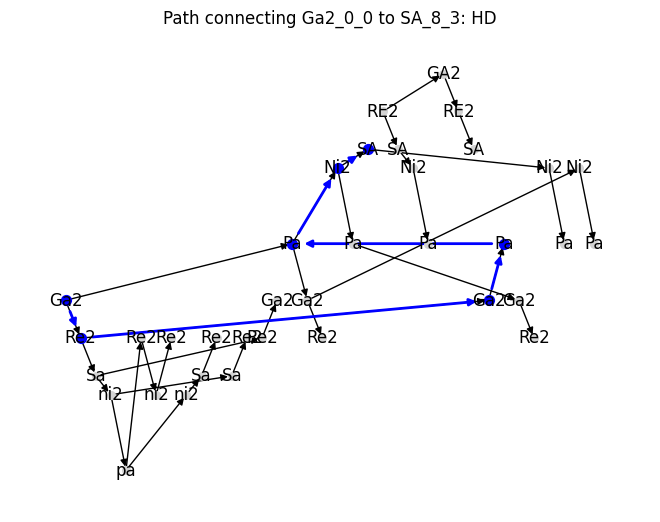

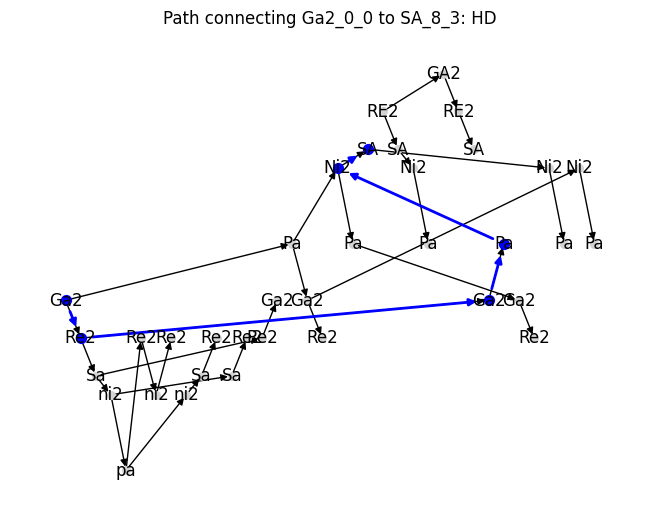

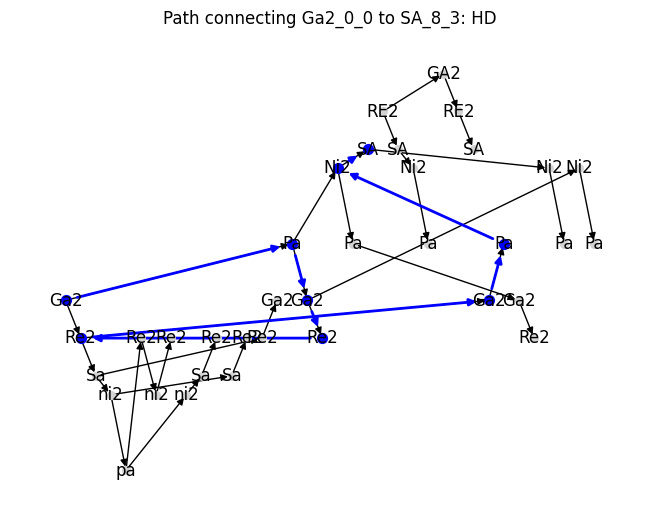

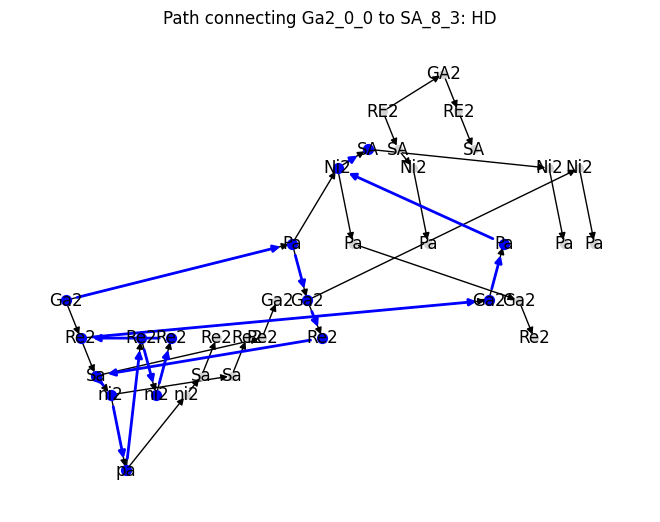

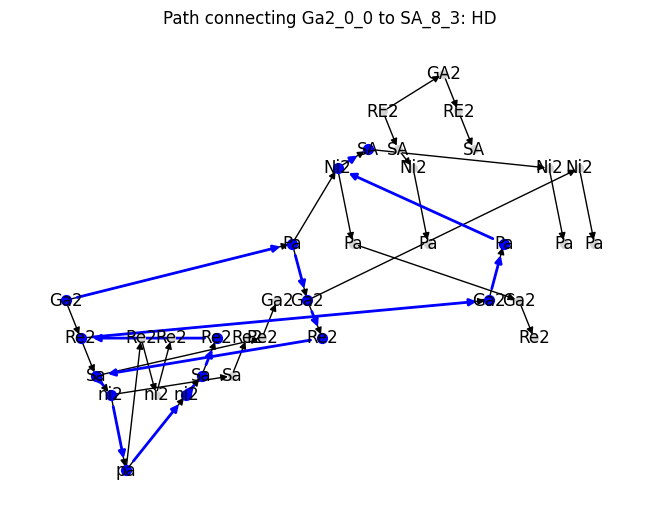

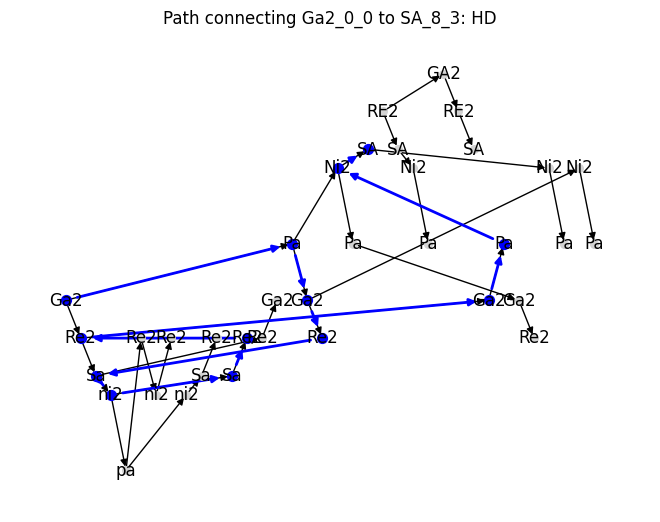

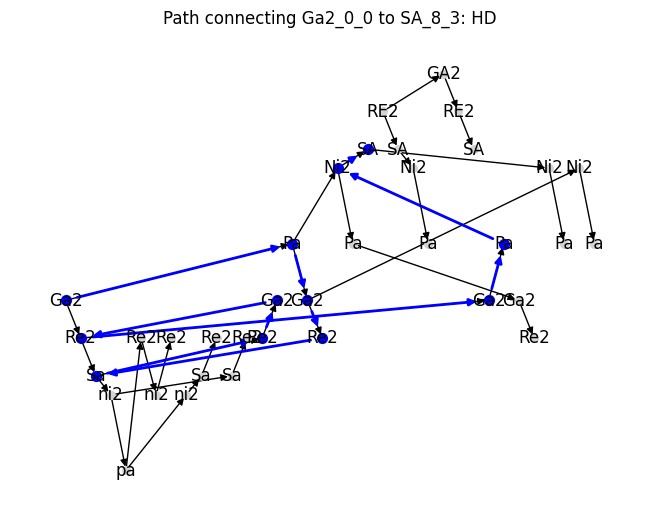

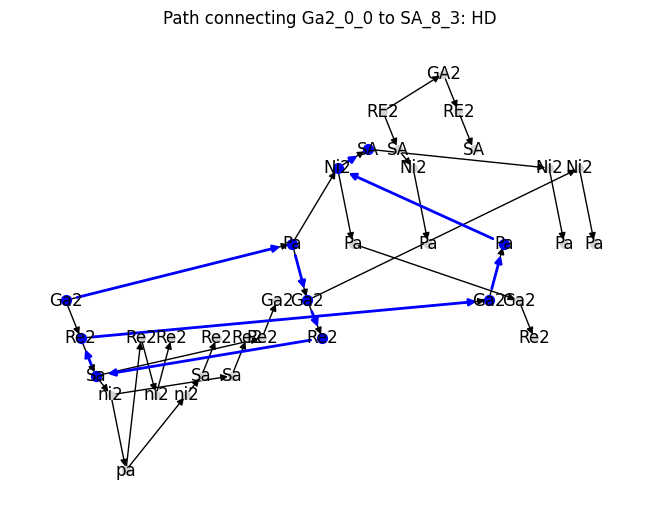

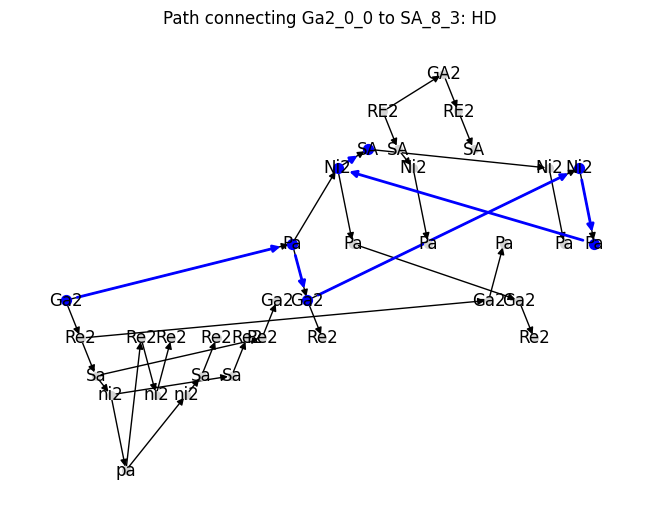

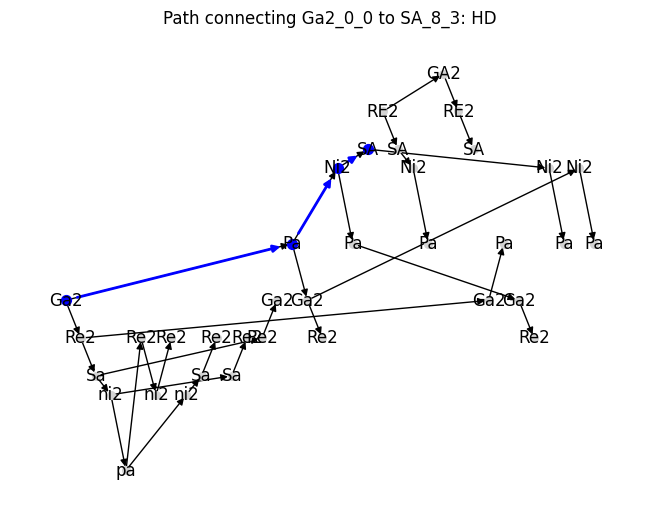

In [19]:
title = f"Path connecting {node_1} to {node_2}: HD"
for path in all_paths:
    visualize_paths(compact_graph, [path], note_levels,title)

In [20]:
def find_all_paths_between_levels(graph, start_note, end_note):
    # Identify all vertices at the start and end levels
    start_vertices = [vertex for vertex, attributes in graph.nodes(data=True) if attributes["note"] == start_note]
    end_vertices = [vertex for vertex, attributes in graph.nodes(data=True) if attributes["note"] == end_note]

    all_paths = []
    for start_vertex in start_vertices:
        for end_vertex in end_vertices:
            paths = find_all_paths(graph, start_vertex, end_vertex)
            all_paths.extend(paths)

    return all_paths


In [21]:
# Find paths from one level to another
starting_level = "Ga2"
ending_level = "SA"
paths_between_levels = find_all_paths_between_levels(graph_virtual, starting_level, ending_level)

In [22]:
len(paths_between_levels)

720

In [23]:
def remove_double_notes(graph,paths):
    new_paths = []
    count = 0
    for path in paths:
        #print(f"now working with {path}")
        new_path = []
        for i in range(len(path)):
            #print(f"curent node: {path[i]}")
            if i>0 and level(path[i],graph) == level(new_path[-1],graph):
                #print(f"removed {path[i]} at level {level(path[i])}")
                continue
            else:
                new_path.append(path[i])
        #print(f"new_path {new_path}")
        new_paths.extend([new_path])
        count += 1
        #if count < 4:
        #    print(f"all paths: {new_paths}")

    return new_paths

def level(node,graph):
    return graph.nodes()[node]['note']

In [24]:
paths_no_doubles = remove_double_notes(graph_virtual,paths_between_levels)

In [25]:
len(paths_no_doubles)

720

In [26]:
def remove_redundant_paths(graph,paths):
    unique_paths = []
    for path in paths:
        redundant = False
        for unique_path in unique_paths:
            if check_match(graph,path,unique_path):
                redundant = True
                break
        if redundant:
            continue
        else:
            unique_paths.extend([path])

    return unique_paths

def check_match(graph,path_1,path_2):
    if len(path_1) != len(path_2):
        return False
    match = True
    for i in range(len(path_1)):
        match = ((level(path_1[i],graph) == level(path_2[i],graph)) and match)
    return match

In [27]:
paths_ = remove_redundant_paths(graph_virtual,paths_no_doubles)

In [28]:
len(paths_)

306

In [29]:
max_length = 8
trimmed_paths = [x for x in paths_ if len(x) < max_length]

In [30]:
len(trimmed_paths)

11

In [31]:
def paths_to_phrases(paths):
    phrases = []
    for path in paths:
        phrase = []
        for node in path:
            phrase.append(level(node,graph_virtual))
        phrases.extend([phrase])
    return phrases

In [32]:
for path in paths_to_phrases(trimmed_paths):
    print(path)

['Ga2', 'Re2', 'Ga2', 'Pa', 'Ni2', 'SA']
['Ga2', 'Pa', 'Ga2', 'Ni2', 'Pa', 'Ni2', 'SA']
['Ga2', 'Pa', 'Ni2', 'SA']
['Ga2', 'Pa', 'Ni2', 'SA', 'RE2', 'SA']
['Ga2', 'Re2', 'Sa', 'Ga2', 'Pa', 'Ni2', 'SA']
['Ga2', 'Sa', 'Ga2', 'Pa', 'Ni2', 'SA']
['Ga2', 'Sa', 'Re2', 'Ga2', 'Pa', 'Ni2', 'SA']
['Ga2', 'Ni2', 'Pa', 'Ga2', 'Pa', 'Ni2', 'SA']
['Ga2', 'Ni2', 'Pa', 'Ni2', 'SA']
['Ga2', 'Ni2', 'Pa', 'Ni2', 'SA', 'RE2', 'SA']
['Ga2', 'Pa', 'Ga2', 'Pa', 'Ni2', 'SA']


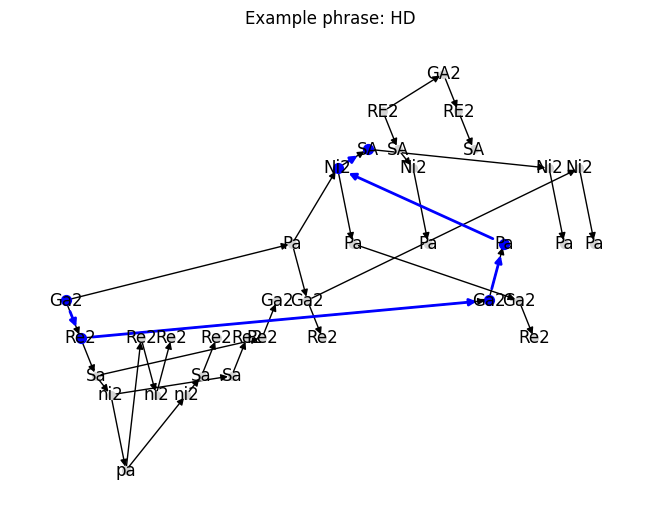

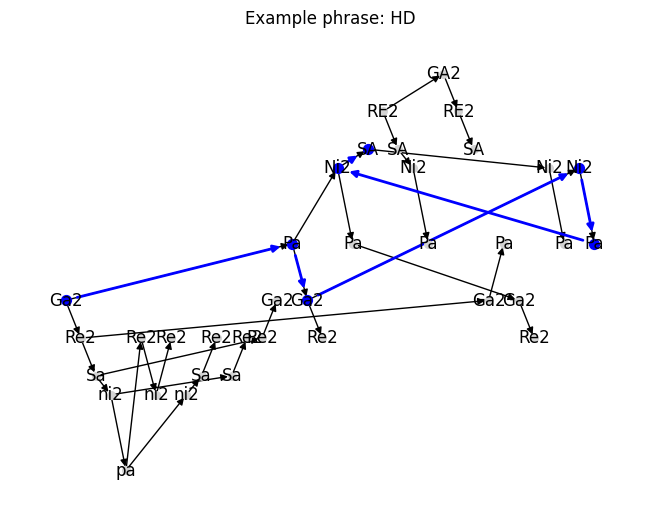

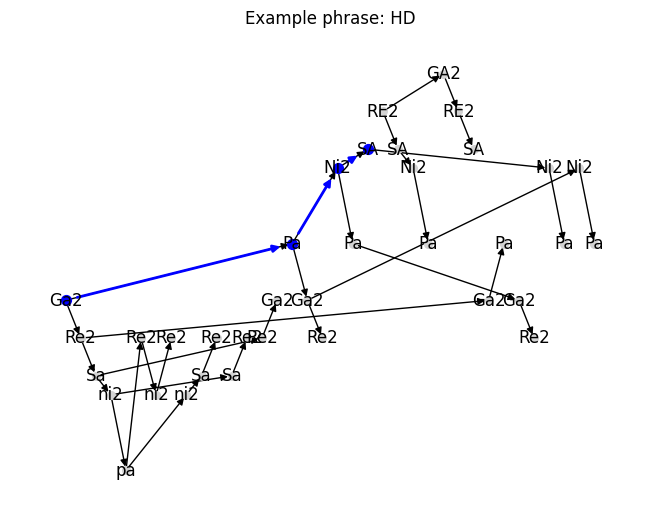

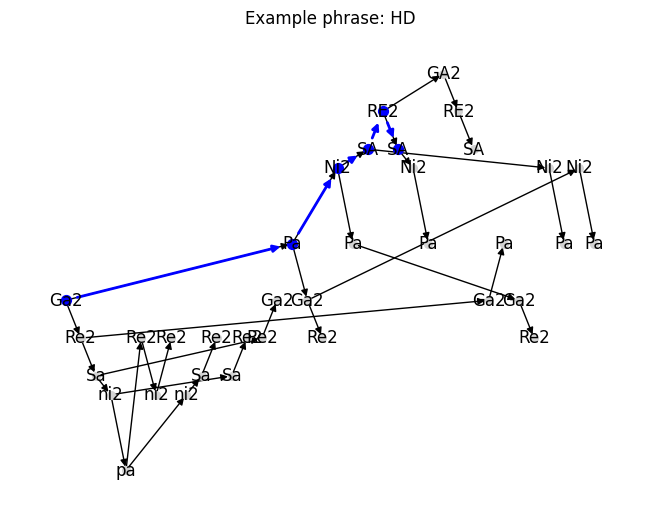

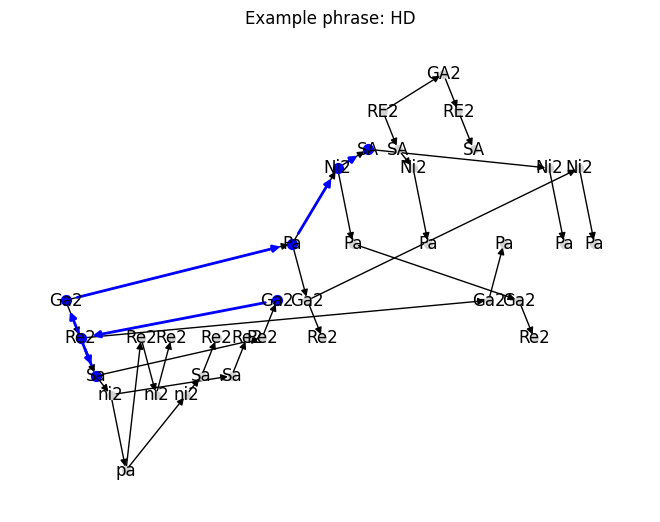

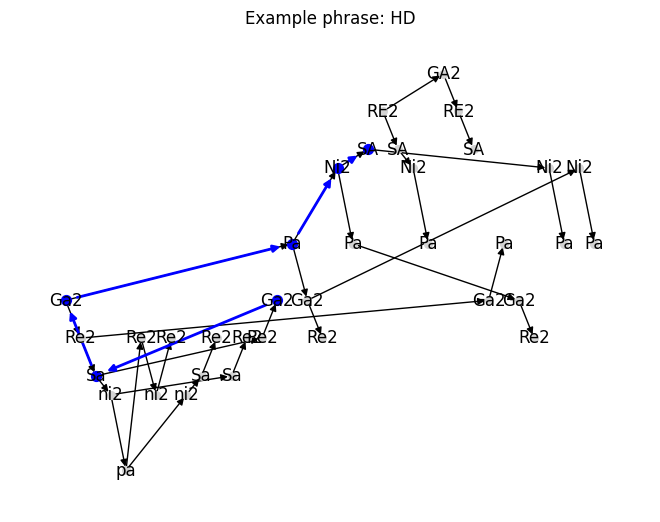

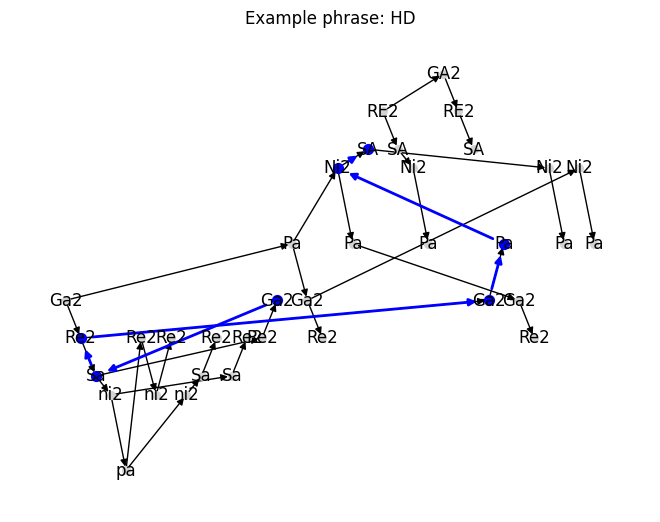

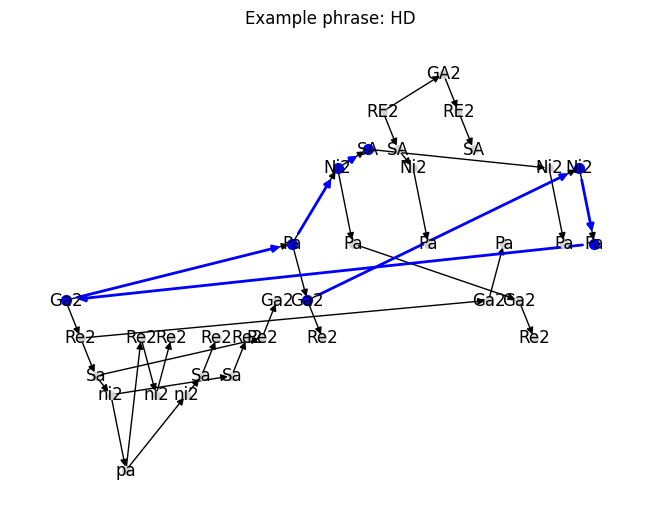

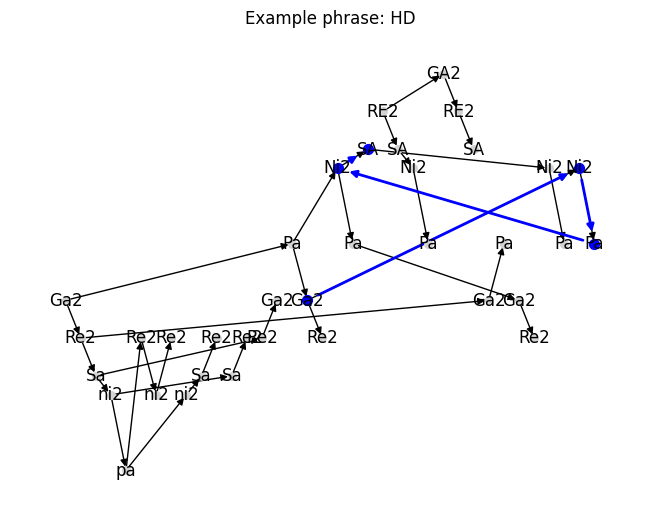

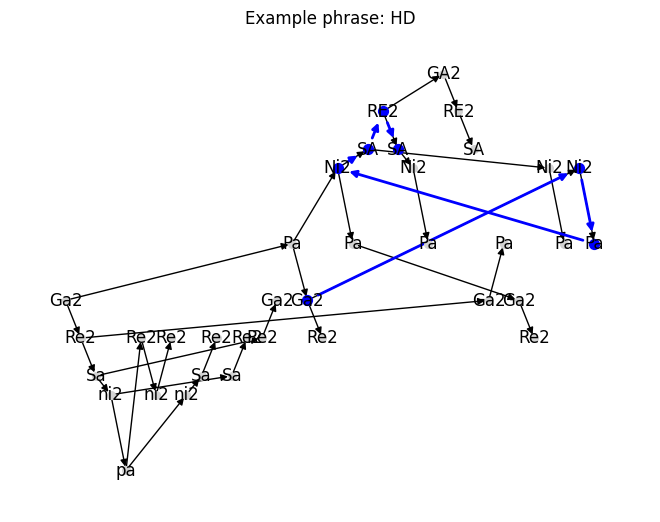

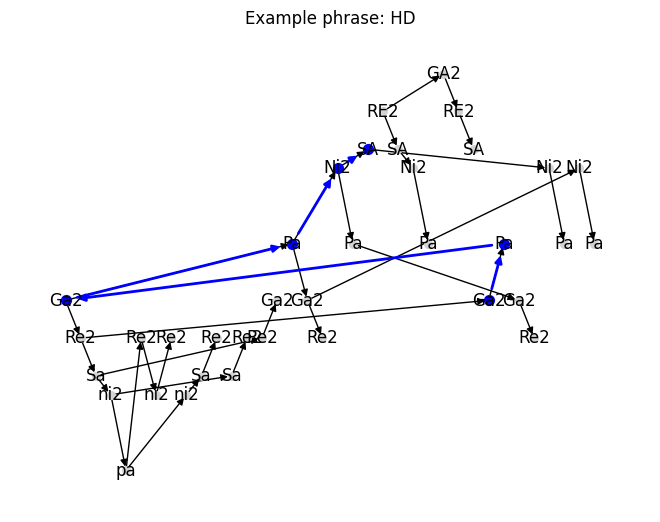

In [33]:
title = "Example phrase: HD"
for path in trimmed_paths:
    visualize_paths(compact_graph, [path], note_levels, title)

####Example 2

In [34]:
# Find paths from one level to another
starting_level = "Pa"
ending_level = "RE2"
paths_between_levels = find_all_paths_between_levels(graph_virtual, starting_level, ending_level)

In [35]:
len(paths_between_levels)

446

In [36]:
paths_no_doubles = remove_double_notes(graph_virtual,paths_between_levels)

In [37]:
len(paths_no_doubles)

446

In [38]:
paths_ = remove_redundant_paths(graph_virtual,paths_no_doubles)

In [39]:
len(paths_)

124

In [40]:
max_length = 8
trimmed_paths = [x for x in paths_ if len(x) < max_length]

In [41]:
len(trimmed_paths)

4

In [42]:
for path in paths_to_phrases(trimmed_paths):
    print(path)

['Pa', 'Ga2', 'Ni2', 'Pa', 'Ni2', 'SA', 'RE2']
['Pa', 'Ni2', 'SA', 'RE2']
['Pa', 'Ni2', 'SA', 'RE2', 'GA2', 'RE2']
['Pa', 'Ga2', 'Pa', 'Ni2', 'SA', 'RE2']


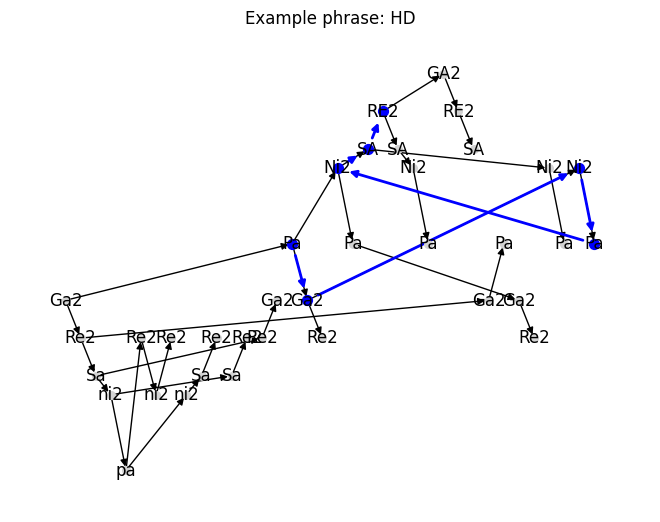

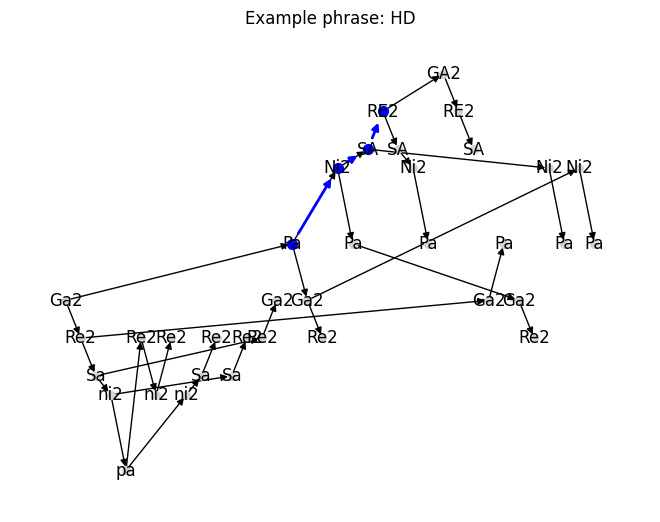

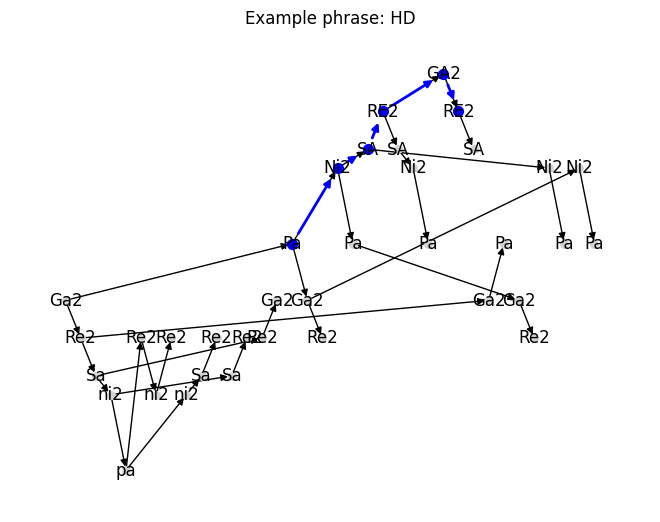

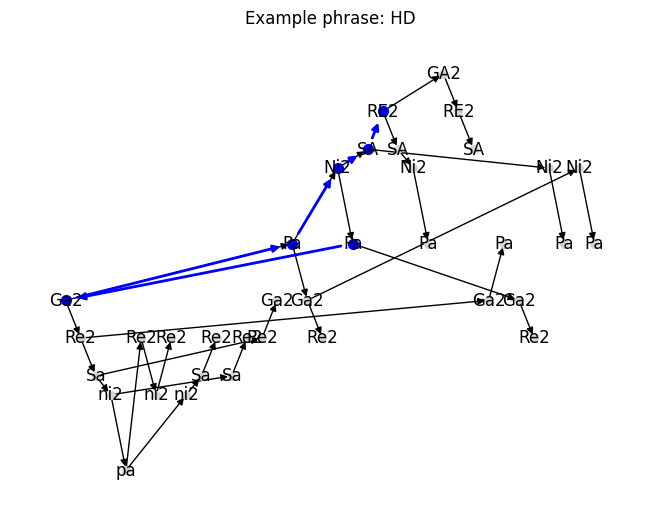

In [43]:
title = "Example phrase: HD"
for path in trimmed_paths:
    visualize_paths(compact_graph, [path], note_levels,title)

####Example 3

In [44]:
# Find paths from one level to another
starting_level = "Ga2"
ending_level = "Re2"
paths_between_levels = find_all_paths_between_levels(graph_virtual, starting_level, ending_level)

In [45]:
len(paths_between_levels)

1478

In [46]:
paths_no_doubles = remove_double_notes(graph_virtual,paths_between_levels)

In [47]:
len(paths_no_doubles)

1478

In [48]:
paths_ = remove_redundant_paths(graph_virtual,paths_no_doubles)

In [49]:
len(paths_)

537

In [52]:
max_length = 5
trimmed_paths = [x for x in paths_ if len(x) < max_length]

In [53]:
len(trimmed_paths)

6

In [54]:
for path in paths_to_phrases(trimmed_paths):
    print(path)

['Ga2', 'Re2']
['Ga2', 'Pa', 'Ga2', 'Re2']
['Ga2', 'Re2', 'Sa', 'Re2']
['Ga2', 'Sa', 'Ga2', 'Re2']
['Ga2', 'Sa', 'Re2']
['Ga2', 'Re2', 'Ga2', 'Re2']


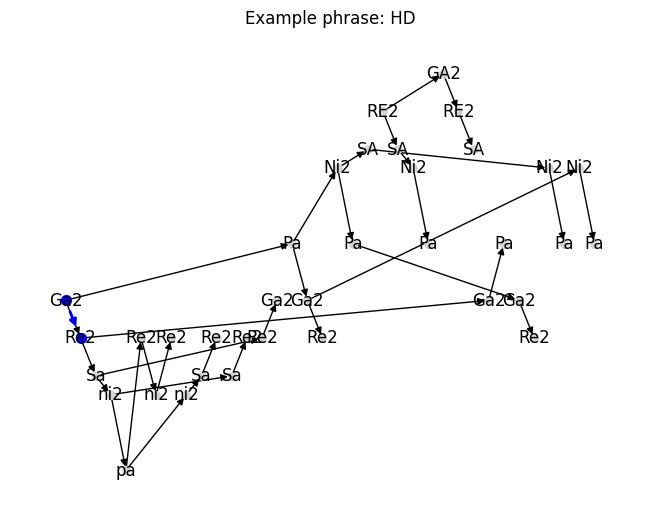

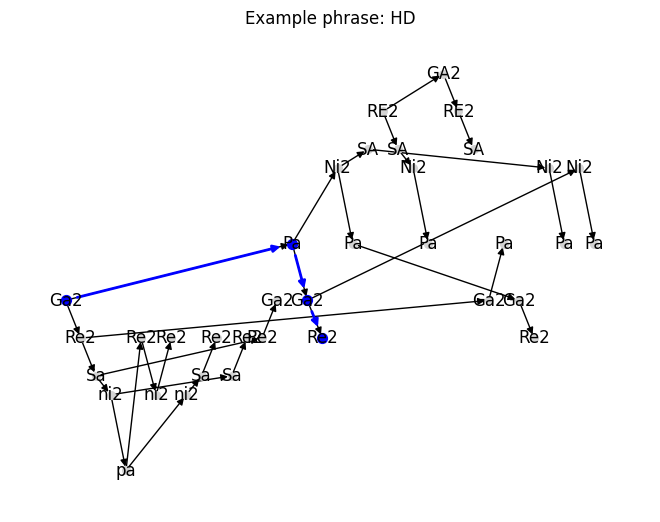

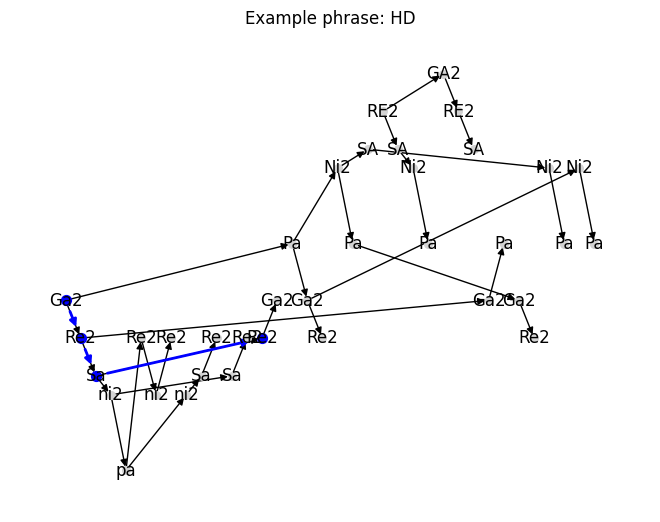

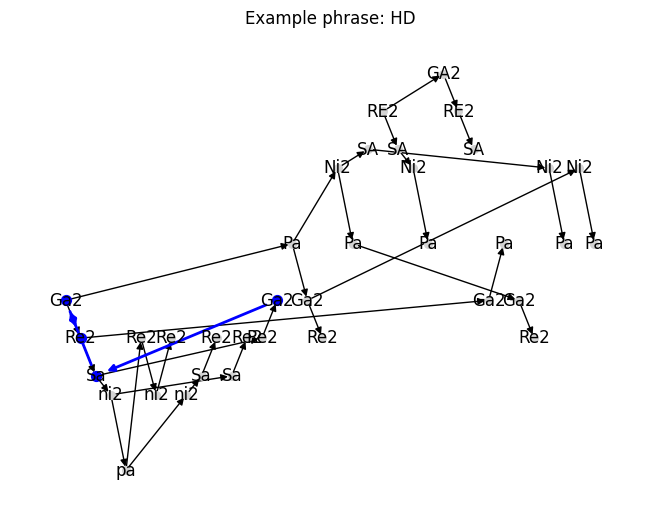

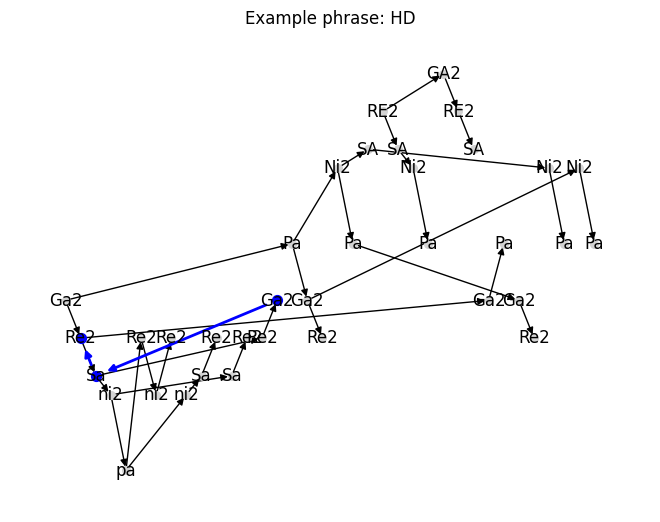

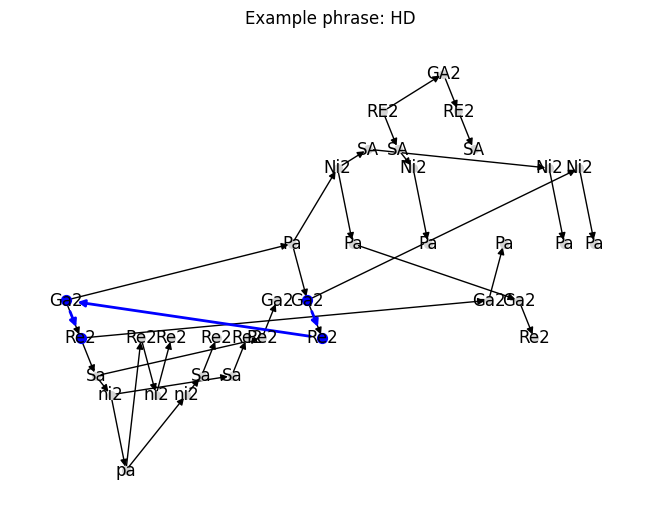

In [55]:
title = "Example phrase: HD"
for path in trimmed_paths:
    visualize_paths(compact_graph, [path], note_levels, title)

#### Random starting and ending points

In [56]:
import random

In [57]:
def collapse(phrases):
    note_list = []
    for phrase in phrases:
        for note in phrase:
            note_list.append(note)
    return note_list

In [58]:
phrases_collapsed = collapse(phrases_list)

In [59]:
# Find paths from one level to another
starting_level = random.sample(phrases_collapsed, 1)[0]
ending_level = random.sample(phrases_collapsed, 1)[0]
print(starting_level,ending_level)

RE2 Pa


In [60]:
paths_between_levels = find_all_paths_between_levels(graph_virtual, starting_level, ending_level)

In [61]:
len(paths_between_levels)

1775

In [62]:
paths_no_doubles = remove_double_notes(graph_virtual,paths_between_levels)

In [63]:
len(paths_no_doubles)

1775

In [64]:
paths_ = remove_redundant_paths(graph_virtual,paths_no_doubles)

In [65]:
len(paths_)

651

In [72]:
max_length = 7
trimmed_paths = [x for x in paths_ if len(x) < max_length]

In [73]:
len(trimmed_paths)

6

In [74]:
for path in paths_to_phrases(trimmed_paths):
    print(path)

['RE2', 'SA', 'Ni2', 'Pa', 'Ga2', 'Pa']
['RE2', 'SA', 'Ni2', 'Pa']
['RE2', 'SA', 'Ni2', 'Pa', 'Ni2', 'Pa']
['RE2', 'GA2', 'RE2', 'SA', 'Ni2', 'Pa']
['RE2', 'SA', 'Ni2', 'SA', 'Ni2', 'Pa']
['RE2', 'SA', 'RE2', 'SA', 'Ni2', 'Pa']


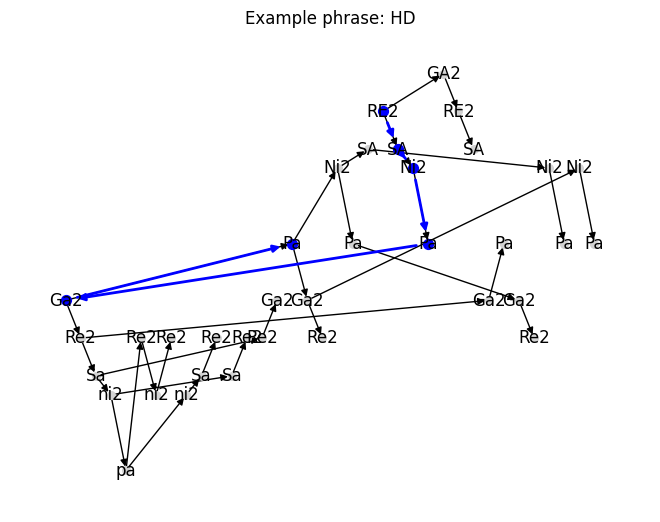

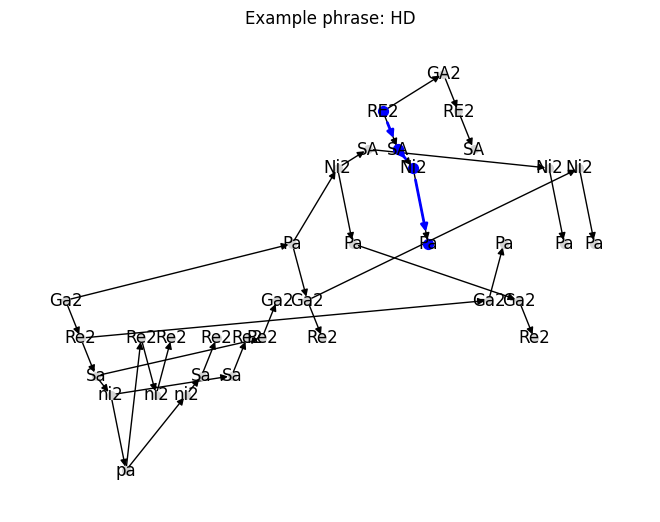

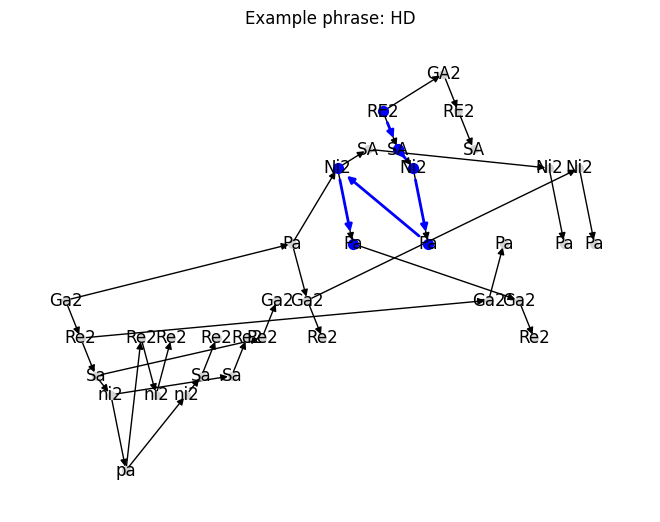

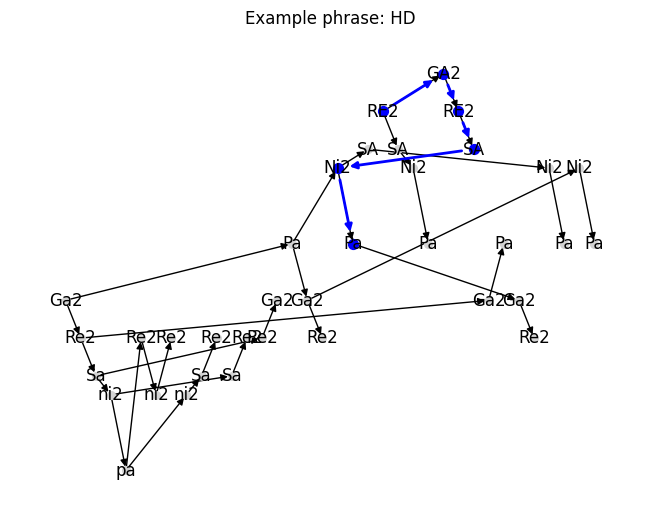

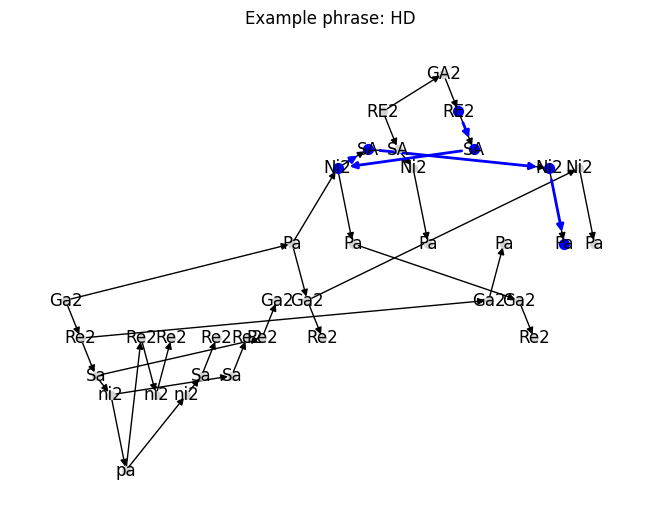

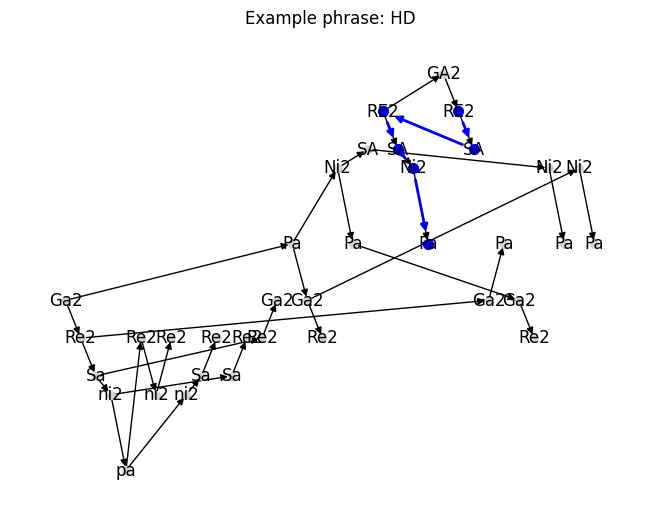

In [75]:
title = "Example phrase: HD"
for path in trimmed_paths:
    visualize_paths(compact_graph, [path], note_levels, title)

####Generating random sequences:

In [76]:
import random

In [77]:
def collapse(phrases):
    note_list = []
    for phrase in phrases:
        for note in phrase:
            note_list.append(note)
    return note_list

In [78]:
phrases_collapsed = collapse(phrases_list)

In [79]:
print(phrases_collapsed)

['Ga2', 'Re2', 'Sa', 'Re2', 'Sa', 'ni2', 'pa', 'pa', 'Re2', 'ni2', 'Re2', 'pa', 'ni2', 'Sa', 'Re2', 'Sa', 'ni2', 'Sa', 'Re2', 'Sa', 'Re2', 'Ga2', 'Ga2', 'Pa', 'Ga2', 'Re2', 'Ga2', 'Pa', 'Ni2', 'Pa', 'Ga2', 'Pa', 'Ni2', 'SA', 'RE2', 'SA', 'Ni2', 'Pa', 'RE2', 'GA2', 'RE2', 'SA', 'Ga2', 'Re2', 'Ga2', 'Pa', 'Ni2', 'Pa', 'Ga2', 'Re2', 'Pa', 'Ga2', 'Re2', 'SA', 'Ni2', 'Pa', 'Pa', 'Ga2', 'Ni2', 'Pa']


In [80]:
len(phrases_collapsed)

60

In [81]:
number_of_phrases = 20
max_length = 10

n = random.randrange(max_length)
random_phrases = [random.sample(phrases_collapsed, n)]
print(random_phrases)

for i in range(number_of_phrases-1):

    n = random.randrange(max_length)
    random_phrases.append(random.sample(phrases_collapsed, n))

print(random_phrases)

[['Re2', 'Pa', 'ni2', 'Sa', 'RE2', 'Pa', 'Re2']]
[['Re2', 'Pa', 'ni2', 'Sa', 'RE2', 'Pa', 'Re2'], [], ['Sa', 'Sa', 'Re2', 'Re2', 'Re2'], [], ['Ni2', 'SA', 'Re2', 'Pa'], ['ni2', 'SA', 'SA', 'RE2', 'SA'], ['Pa', 'SA', 'Re2', 'Pa'], ['Re2', 'Re2'], [], ['ni2', 'Pa', 'Sa', 'ni2', 'RE2', 'Ga2'], ['Pa', 'Ni2', 'SA', 'Ga2', 'Ni2'], ['Re2'], ['Ga2', 'Re2', 'Ni2', 'SA'], ['pa', 'Sa', 'Ga2'], ['Re2', 'Re2', 'Ni2', 'Re2', 'Ga2', 'Ni2', 'SA', 'Ga2', 'Ni2'], [], ['Pa'], ['Sa', 'RE2', 'Ga2', 'pa', 'Ga2'], ['ni2', 'Pa', 'Pa', 'Re2', 'ni2', 'SA', 'Ga2'], ['Ga2', 'Pa', 'RE2', 'pa']]


In [82]:
len(random_phrases)

20

In [83]:
def remove_double_from_random(paths):
    new_paths = []
    count = 0
    for path in paths:
        #print(f"now working with {path}")
        new_path = []
        for i in range(len(path)):
            #print(f"curent node: {path[i]}")
            if i>0 and path[i] == new_path[-1]:
                #print(f"removed {path[i]} at level {level(path[i])}")
                continue
            else:
                new_path.append(path[i])
        #print(f"new_path {new_path}")
        new_paths.extend([new_path])
        count += 1
        #if count < 4:
        #    print(f"all paths: {new_paths}")

    return new_paths


In [84]:
paths_no_doubles = remove_double_from_random(random_phrases)

In [85]:
for path in paths_no_doubles:
    print(path)

['Re2', 'Pa', 'ni2', 'Sa', 'RE2', 'Pa', 'Re2']
[]
['Sa', 'Re2']
[]
['Ni2', 'SA', 'Re2', 'Pa']
['ni2', 'SA', 'RE2', 'SA']
['Pa', 'SA', 'Re2', 'Pa']
['Re2']
[]
['ni2', 'Pa', 'Sa', 'ni2', 'RE2', 'Ga2']
['Pa', 'Ni2', 'SA', 'Ga2', 'Ni2']
['Re2']
['Ga2', 'Re2', 'Ni2', 'SA']
['pa', 'Sa', 'Ga2']
['Re2', 'Ni2', 'Re2', 'Ga2', 'Ni2', 'SA', 'Ga2', 'Ni2']
[]
['Pa']
['Sa', 'RE2', 'Ga2', 'pa', 'Ga2']
['ni2', 'Pa', 'Re2', 'ni2', 'SA', 'Ga2']
['Ga2', 'Pa', 'RE2', 'pa']


In [88]:
def remove_redundant_from_random(paths):
    unique_paths = []
    for path in paths:
        redundant = False
        for unique_path in unique_paths:
            if check_match_random(path,unique_path):
                redundant = True
                break
        if redundant:
            continue
        else:
            unique_paths.extend([path])


    return unique_paths

def check_match_random(path_1,path_2):
    if len(path_1) != len(path_2):
        return False
    match = True
    for i in range(len(path_1)):
        match = ((path_1[i] == path_2[i]) and match)
    return match

In [89]:
paths_ = remove_redundant_from_random(paths_no_doubles)

In [90]:
for path in paths_:
    print(path)

['Re2', 'Pa', 'ni2', 'Sa', 'RE2', 'Pa', 'Re2']
[]
['Sa', 'Re2']
['Ni2', 'SA', 'Re2', 'Pa']
['ni2', 'SA', 'RE2', 'SA']
['Pa', 'SA', 'Re2', 'Pa']
['Re2']
['ni2', 'Pa', 'Sa', 'ni2', 'RE2', 'Ga2']
['Pa', 'Ni2', 'SA', 'Ga2', 'Ni2']
['Ga2', 'Re2', 'Ni2', 'SA']
['pa', 'Sa', 'Ga2']
['Re2', 'Ni2', 'Re2', 'Ga2', 'Ni2', 'SA', 'Ga2', 'Ni2']
['Pa']
['Sa', 'RE2', 'Ga2', 'pa', 'Ga2']
['ni2', 'Pa', 'Re2', 'ni2', 'SA', 'Ga2']
['Ga2', 'Pa', 'RE2', 'pa']
